# Yelp Data Challenge - NLP


Sep 2018

## data description
### business info
#### *business_id, *categories, *city, *name, *review_count,  *avg_stars

### customer info
#### *review_id,  *user_id, *cool, *funny, *useful, *stars, text

## Import data

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [2]:
df = pd.read_csv('clean_busi_rev_joint.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488769 entries, 0 to 488768
Data columns (total 14 columns):
business_id     488769 non-null object
categories      488769 non-null object
city            488769 non-null object
name            488769 non-null object
review_count    488769 non-null int64
avg_stars       488769 non-null float64
cool            488769 non-null int64
date            488769 non-null object
funny           488769 non-null int64
review_id       488769 non-null object
stars           488769 non-null int64
text            488769 non-null object
useful          488769 non-null int64
user_id         488769 non-null object
dtypes: float64(1), int64(5), object(8)
memory usage: 52.2+ MB


In [4]:
df.head(5)

,business_id,categories,city,name,review_count,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,--9e1ONYQuAa-CB_Rrw7Tw,"Steakhouses, Restaurants, Cajun/Creole",Las Vegas,Delmonico Steakhouse,1546,4.0,0,2017-02-14,0,VETXTwMw6qxzOVDlXfe6Tg,5,went for dinner tonight. Amazing my husband ha...,0,ymlnR8UeFvB4FZL56tCZsA
1,--9e1ONYQuAa-CB_Rrw7Tw,"Steakhouses, Restaurants, Cajun/Creole",Las Vegas,Delmonico Steakhouse,1546,4.0,0,2017-12-04,0,S8-8uZ7fa5YbjnEtaW15ng,5,This was an amazing dinning experience! ORDER ...,0,9pSSL6X6lFpY3FCRLEH3og
2,--9e1ONYQuAa-CB_Rrw7Tw,"Steakhouses, Restaurants, Cajun/Creole",Las Vegas,Delmonico Steakhouse,1546,4.0,0,2016-08-22,1,1nK5w0VNfDlnR3bOz13dJQ,5,My husband and I went there for lunch on a Sat...,1,gm8nNoA3uB4In5o_Hxpq3g
3,--9e1ONYQuAa-CB_Rrw7Tw,"Steakhouses, Restaurants, Cajun/Creole",Las Vegas,Delmonico Steakhouse,1546,4.0,0,2016-09-13,0,N1Z93BthdJ7FT2p5S22jIA,3,Went for a nice anniversary dinner. Researched...,0,CEtidlXNyQzgJSdF1ubPFw
4,--9e1ONYQuAa-CB_Rrw7Tw,"Steakhouses, Restaurants, Cajun/Creole",Las Vegas,Delmonico Steakhouse,1546,4.0,0,2016-08-08,0,ir-EVhHyWna7KqYWtj660g,5,Hands down the best meal and service I have ev...,0,9_BhDyzJYf2JwTD9TyXJ4g


In [5]:
df.describe()

,review_count,avg_stars,cool,funny,stars,useful
count,488769.000000,488769.000000,488769.000000,488769.000000,488769.000000,488769.000000
mean,909.766953,3.845618,0.582279,0.416190,3.836203,0.929895
std,1283.889899,0.597600,2.951839,2.198931,1.429897,3.440483
min,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,209.000000,3.500000,0.000000,0.000000,3.000000,0.000000
50%,459.000000,4.000000,0.000000,0.000000,4.000000,0.000000
75%,1024.000000,4.500000,0.000000,0.000000,5.000000,1.000000
max,7968.000000,5.000000,227.000000,202.000000,5.000000,236.000000


In [6]:
# inspect your documents, e.g. check the size, take a peek at elements of the numpy array
print(df.isnull().sum(),len(df))


business_id     0
categories      0
city            0
name            0
review_count    0
avg_stars       0
cool            0
date            0
funny           0
review_id       0
stars           0
text            0
useful          0
user_id         0
dtype: int64 488769


## Exploratory data analysis(EDA)

#### Check the histogram of the avg_star(restaurant performance)

Text(0,0.5,'counts')

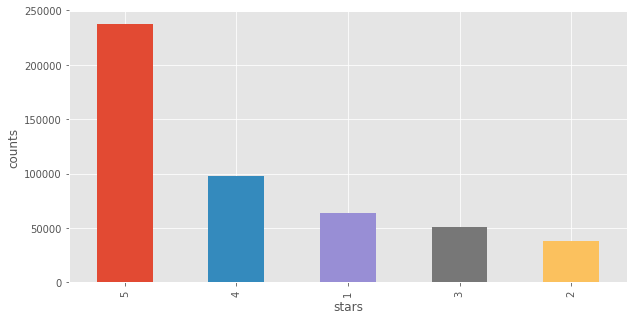

In [6]:
h=df['stars'].value_counts().plot(kind='bar', align='center',width=0.5,figsize=(10,5))
plt.xlabel('stars', fontdict=None, labelpad=None)
plt.ylabel('counts', fontdict=None, labelpad=None)

#### * Before jumping to review text,  take a loo at  text length statistics

In [7]:
df['text length']=df['text'].apply(len)# measure how long a review is 

In [8]:
df.head(5)

,business_id,categories,city,name,review_count,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id,text length
0,--9e1ONYQuAa-CB_Rrw7Tw,"Steakhouses, Restaurants, Cajun/Creole",Las Vegas,Delmonico Steakhouse,1546,4.0,0,2017-02-14,0,VETXTwMw6qxzOVDlXfe6Tg,5,went for dinner tonight. Amazing my husband ha...,0,ymlnR8UeFvB4FZL56tCZsA,252
1,--9e1ONYQuAa-CB_Rrw7Tw,"Steakhouses, Restaurants, Cajun/Creole",Las Vegas,Delmonico Steakhouse,1546,4.0,0,2017-12-04,0,S8-8uZ7fa5YbjnEtaW15ng,5,This was an amazing dinning experience! ORDER ...,0,9pSSL6X6lFpY3FCRLEH3og,86
2,--9e1ONYQuAa-CB_Rrw7Tw,"Steakhouses, Restaurants, Cajun/Creole",Las Vegas,Delmonico Steakhouse,1546,4.0,0,2016-08-22,1,1nK5w0VNfDlnR3bOz13dJQ,5,My husband and I went there for lunch on a Sat...,1,gm8nNoA3uB4In5o_Hxpq3g,2212
3,--9e1ONYQuAa-CB_Rrw7Tw,"Steakhouses, Restaurants, Cajun/Creole",Las Vegas,Delmonico Steakhouse,1546,4.0,0,2016-09-13,0,N1Z93BthdJ7FT2p5S22jIA,3,Went for a nice anniversary dinner. Researched...,0,CEtidlXNyQzgJSdF1ubPFw,860
4,--9e1ONYQuAa-CB_Rrw7Tw,"Steakhouses, Restaurants, Cajun/Creole",Las Vegas,Delmonico Steakhouse,1546,4.0,0,2016-08-08,0,ir-EVhHyWna7KqYWtj660g,5,Hands down the best meal and service I have ev...,0,9_BhDyzJYf2JwTD9TyXJ4g,312


Text(0.5,0,'text length')

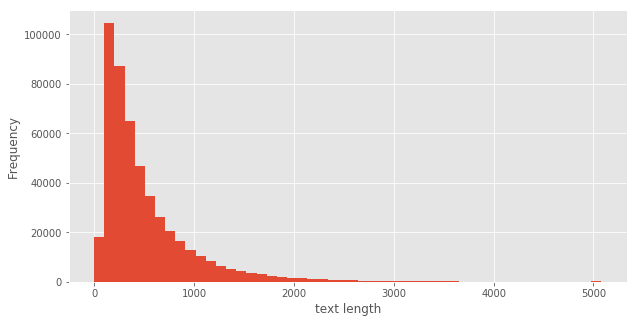

In [9]:
df['text length'].plot.hist(bins=50,label='text length',figsize=(10,5))
plt.xlabel('text length', fontdict=None, labelpad=None)

In [10]:
df['text length'].describe()

count    488769.000000
mean        515.782525
std         492.901409
min           1.000000
25%         204.000000
50%         356.000000
75%         647.000000
max        5080.000000
Name: text length, dtype: float64

In [11]:
print(df.loc[df['text length']==5080]['stars'].values, df.loc[df['text length']==5080]['text'].values,)

[3] ['"Just let me go we\'ll meet again soon\r\n"Now wait, wait, wait for me\r\n"Please hang around\r\n"I\'ll see you when I fall asleep"\r\n\r\n-------------------------------------\r\n\r\nIn A Sentence\x99\r\nA faux-Mexican chain conveniently located in the far-North neighbourhood of Centennial. (Winter is Coming®.)\r\n\r\nQuick Review\x99\r\n+ Chicken, pork*, steak, soy, vegetarian burritos/bowls, et cetera. They run through their queues fast as hell now (post-2015 scandal). (*Overheard today: "is carnitas pork?" Heh.) \r\n\r\n- Nickel and diming: 2$ upcharge for guacamole? Bruv, an USDA-certified organic avocado is a buck at Smith\'s across the lot. \r\n\r\nEmployee of Excellence\x99\r\n+ The cashier/till employee\'s right-hand woman, typically the conduit between the Ford assembly line and the cashier, who noticed tonight that I had left my fancy phone on the wooding that frames the till area after having placed it there to get my free burrito offer scanned. \r\n\r\n--------------

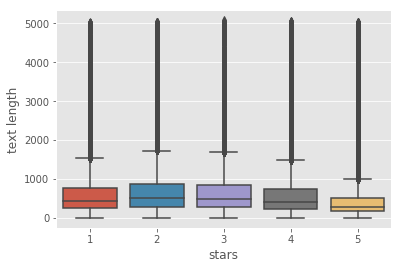

In [12]:
sns.boxplot(x='stars', y='text length', data=df)
plt.savefig('Fig_boxplot_stars.pdf')

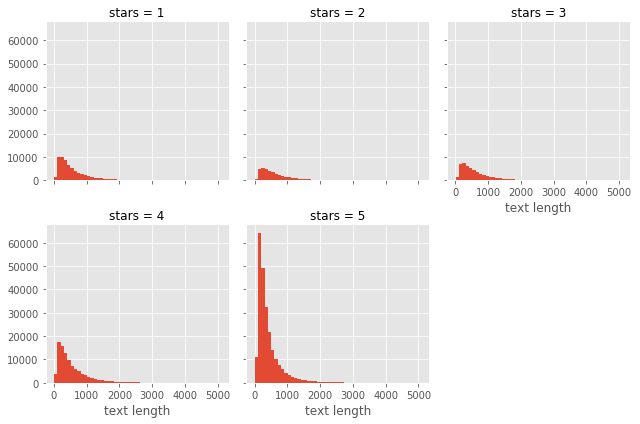

In [13]:
g = sns.FacetGrid(data=df, col='stars',col_wrap=3)
g.map(plt.hist, 'text length', bins=50)
plt.savefig('Fig_hist_stars.pdf')

#### *rating is a direct meaure of customer's satisfaction, I am interested in high rating (4.5 stars and above) and imperfect (1-4.5 stars) rating

In [37]:
# category the reviews, the
df['target']=[1 if element > 4 else 0 for element in df['stars']]  
target=df['target']

#### *Check statistic of the target variable

In [15]:
# To be implemented
target.describe()

count    488769.000000
mean          0.687415
std           0.463547
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: target, dtype: float64

In [38]:
# Take a look at the review
documents=df['text'].values
print(documents[10],documents.shape)

10/27/2016-I had my birthday dinner here and it was worth the splurge.  I have to say something about the décor - it was too plain and sterile and I expected a little more character from this establishment.  I would have added some wood paneling or some framed mirrors.  But the food was worth it.  We ordered the New Orleans BBQ Shrimp, Butternut Squash Ravioli, Traditional New Orleans Gumbo, and of course the 16 oz Rib Eye steak.  Our side dishes included the Country Smashed Potato, Delmonico Creamed Spinach, Buttered Fresh Asparagus, and Sauteed Garlic Mushrooms.  All the dishes we ordered were delicious.  Our steak was medium rare and it was sooo good.  The meat was tender with the right amount of fatty goodness.  My favorite sides were the asparagus (cooked just right, not over or under cooked) and the mushrooms.  The creamed spinach was a little too salty for me.  They added a nice touch to my birthday by serving complimentary appetizer and dessert (mango sorbet) (488769,)


## Create training dataset and test dataset

In [39]:
from sklearn.cross_validation import train_test_split

In [40]:
# Documents is your X, target is your y
# Now split the data to training set and test set
documents_train, documents_test, target_train, target_test = train_test_split(documents, target, test_size=0.3, random_state=0)

In [41]:
documents_train.shape

(342138,)

## NLP representation of the documents

In [42]:
#TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [43]:
# Create TfidfVectorizer, and name it vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=2000)
type(vectorizer)

sklearn.feature_extraction.text.TfidfVectorizer

In [44]:
# Train the model with the training data
X_train = vectorizer.fit_transform(documents_train).toarray()
words = vectorizer.get_feature_names()

In [24]:
words[0:110]

['00',
 '10',
 '100',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '1st',
 '20',
 '2016',
 '2017',
 '21',
 '22',
 '24',
 '25',
 '2nd',
 '30',
 '30pm',
 '35',
 '3rd',
 '40',
 '45',
 '50',
 '60',
 '75',
 '80',
 '90',
 '95',
 '99',
 'able',
 'absolute',
 'absolutely',
 'accommodate',
 'accommodating',
 'actual',
 'actually',
 'add',
 'added',
 'adding',
 'addition',
 'additional',
 'admit',
 'adults',
 'advance',
 'affordable',
 'afternoon',
 'aged',
 'ago',
 'agree',
 'agreed',
 'ahead',
 'ahi',
 'aioli',
 'air',
 'airport',
 'al',
 'alcohol',
 'alfredo',
 'allow',
 'allowed',
 'almond',
 'alright',
 'amazing',
 'amazingly',
 'ambiance',
 'ambience',
 'american',
 'anniversary',
 'annoyed',
 'annoying',
 'answer',
 'answered',
 'anymore',
 'anytime',
 'anyways',
 'apart',
 'apologize',
 'apologized',
 'apology',
 'app',
 'apparently',
 'appetite',
 'appetizer',
 'appetizers',
 'apple',
 'appreciate',
 'appreciated',
 'apps',
 'area',
 'aren',
 'aria',
 'arrive',
 'arri

In [45]:
# Use the trained model to transform your test data
y_test = target_test
X_test=vectorizer.transform(documents_test).toarray()

In [46]:
# Get the vocab of the tfidf
print(X_train.shape,X_test.shape)

(342138, 2000) (146631, 2000)


In [47]:
from sklearn.feature_extraction.text import CountVectorizer

In [48]:
vect_bow = CountVectorizer(stop_words='english', max_features=2000)

In [49]:
X_train_bow = vect_bow.fit_transform(documents_train).toarray()
words_bow = vect_bow.get_feature_names()

In [50]:
words_bow[0:110]

['00',
 '10',
 '100',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '1st',
 '20',
 '2016',
 '2017',
 '21',
 '22',
 '24',
 '25',
 '2nd',
 '30',
 '30pm',
 '35',
 '3rd',
 '40',
 '45',
 '50',
 '60',
 '75',
 '80',
 '90',
 '95',
 '99',
 'able',
 'absolute',
 'absolutely',
 'accommodate',
 'accommodating',
 'actual',
 'actually',
 'add',
 'added',
 'adding',
 'addition',
 'additional',
 'admit',
 'adults',
 'advance',
 'affordable',
 'afternoon',
 'aged',
 'ago',
 'agree',
 'agreed',
 'ahead',
 'ahi',
 'aioli',
 'air',
 'airport',
 'al',
 'alcohol',
 'alfredo',
 'allow',
 'allowed',
 'almond',
 'alright',
 'amazing',
 'amazingly',
 'ambiance',
 'ambience',
 'american',
 'anniversary',
 'annoyed',
 'annoying',
 'answer',
 'answered',
 'anymore',
 'anytime',
 'anyways',
 'apart',
 'apologize',
 'apologized',
 'apology',
 'app',
 'apparently',
 'appetite',
 'appetizer',
 'appetizers',
 'apple',
 'appreciate',
 'appreciated',
 'apps',
 'area',
 'aren',
 'aria',
 'arrive',
 'arri

In [51]:
X_test_bow=vect_bow.transform(documents_test).toarray()

## Similar review search engine

In [52]:
import numpy as np

# Build functions to return the top search values 

def get_top_values(lst, n, labels):
    '''
    INPUT: LIST, INTEGER, LIST
    OUTPUT: LIST

    Given a list of values, find the indices with the highest n values.
    Return the labels for each of these indices.

    e.g.
    lst = [7, 3, 2, 4, 1]
    n = 2
    labels = ["cat", "dog", "mouse", "pig", "rabbit"]
    output: ["cat", "pig"]
    '''
    return [labels[i] for i in np.argsort(lst)[::-1][:n]]  # np.argsort by default sorts values in ascending order


### Top TFIDF 20 words in the training review set

In [31]:
avg = np.sum(X_train, axis=0) 
print("top 20 by average tf-idf")
print(get_top_values(avg, 20, words))


top 20 by average tf-idf
['food', 'great', 'good', 'place', 'service', 'time', 'just', 'like', 'best', 'vegas', 'amazing', 'really', 'delicious', 'chicken', 'love', 'ordered', 'restaurant', 'definitely', 'order', 'got']


### Top TF 20 words in the training review set

In [43]:
avg_bow = np.sum(X_train_bow, axis=0) 
print("top 20 by average tf")
print(get_top_values(avg_bow, 20, words_bow))

top 20 by average tf
['food', 'good', 'place', 'great', 'service', 'just', 'like', 'time', 'ordered', 'really', 'vegas', 'order', 'restaurant', 'chicken', 'got', 'best', 'came', 'delicious', 've', 'amazing']


## Build a search engine to find similar reviews

In [31]:
# Use cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

In [32]:
# Draw an arbitrary review from test (unseen in training) documents
some_random_number = 42
search_query = documents_test[some_random_number]
search_query = [search_query] # Need to be put into a list-like format
print(df.loc[df['text']==documents_test[some_random_number]]['stars'].values,search_query)

[1] ["I never even went here (went to a neighboring biz) but somehow they found my email address and solicited a review from me. And then didn't reply to my message when I contacted them about it. Well, here's your review! That is just creepy, stalking behavior from your business and completely uncalled for. I still want to know how you got my location data and email address."]


In [33]:
# Transform the drawn review(s) to vector(s)
search_query_vectorized = vectorizer.transform(search_query).toarray() # search_query needs to be a list format! [search_query]
print(search_query_vectorized,search_query_vectorized.shape)

[[0. 0. 0. ... 0. 0. 0.]] (1, 2000)


In [34]:
simi_score_search=cosine_similarity(search_query_vectorized,X_train)

In [115]:
len(simi_score_search[0])

342138

In [116]:
#find the top 5 silimar reviews
n_rev=5
returned_reviews=get_top_values(simi_score_search[0],n_rev,documents_train.tolist())
returned_reviews_bow=get_top_values(simi_score_search_bow[0],n_rev,documents_train_bow.tolist())

In [117]:
returned_rating=[df.loc[df['text']==returned_reviews[i]]['stars'].values[0] for i in range(n_rev)]

In [118]:
returned_review_rating=[[returned_rating[i],returned_reviews[i]] for i in range(n_rev)]

In [119]:
print(returned_review_rating)

[[5, "Left a mediocre review awhile back & finally got around to going again. To be honest I was nervous because I was contacted by Omar, the manager because of my review (he was very polite & wanted to prevent the situation from happening again) so it shows that they care about their customer's experience. Very genuine people! When I went in I sat at the bar again & was automatically greeted by Ruben. I was super awkward since it turned out he recognized me from my review  But he was very chill & attentive. You can tell he was genuine the entire time. When Omar contacted me he offered me a free drink next time I came in but I personally didn't wanna bring that up  I didn't want anyone to know I wrote that review xD But nonetheless, Ruben comped my drink. I never even brought it up so I was taken by surprise. SO FUCKING SWEET! He apologized for my last experience which I didn't expect at all! Definitely give these people a try! They're worth it! P.S. I had the veggie bagel this time, A

## ML model classifying positive/negative review

### Logistic Regression Classifier

In [66]:
# Build a Logistic Regression Classifier

from sklearn.linear_model import LogisticRegression
model_1og= LogisticRegression()
model_1og.fit(X_train,target_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [54]:
# Get score for training set
model_1og.score(X_train, target_train)

0.8342014041117911

In [55]:
# Get score for test set
model_1og.score(X_test, target_test)

0.8306019873014574

In [67]:
model_1og.coef_

array([[-1.04143952e+00,  1.06228843e+00,  1.26364661e+00, ...,
         1.17322515e+00, -2.89675024e+00,  7.55185028e-04]])

In [58]:
model_1og_2= LogisticRegression()
model_1og_2.fit(X_train_bow,target_train)
print(model_1og.score(X_train_bow, target_train),model_1og_2.score(X_test_bow, target_test))

0.8342160180979604 0.830595167461178


In [59]:
model_1og_2.coef_

array([[-0.16660184,  0.14855367,  0.1956599 , ...,  0.20917866,
        -0.75326763, -0.03858717]])

#### *Use cross validation to evaluate the classifiers

[sklearn cross validation](http://scikit-learn.org/stable/modules/cross_validation.html)

In [40]:
# Check the validation score

from sklearn.model_selection import cross_val_score


cv_scores = cross_val_score(model_1og, X_train, y=target_train,
                                scoring="accuracy", cv=5) 


array([-0.83236394, -0.83141404, -0.83229088, -0.8297919 , -0.82889545])

In [42]:
cv_scores

array([0.83236394, 0.83141404, 0.83229088, 0.8297919 , 0.82889545])

#### *Look for words that make the positive predictions

In [69]:
n_word = 20
print(' the top 20 positive words of TF-IDF are :', get_top_values(model_1og.coef_[0], n_word, words))

 the top 20 positive words of TF-IDF are : ['amazing', 'best', 'incredible', 'thank', 'awesome', 'phenomenal', 'perfection', 'heaven', 'delicious', 'perfect', 'highly', 'fantastic', 'excellent', 'great', 'favorite', 'impeccable', 'outstanding', 'love', 'holy', 'fabulous']


In [61]:
n_word = 20
print(' the top 20 positive in bag of words are :', get_top_values(model_1og_2.coef_[0], n_word, words_bow))

 the top 20 positive in bag of words are : ['incredible', 'impeccable', 'phenomenal', 'sooooo', 'amazing', 'deserves', 'heaven', 'thank', 'amazingly', 'everyday', 'holy', 'regret', 'perfection', 'superb', 'hospitality', 'omg', 'best', 'fabulous', 'soooo', 'awesome']


#### *Look for the key words that make the negative prediction

In [63]:
def get_bottom_values(lst, n, labels):
    '''
    INPUT: LIST, INTEGER, LIST
    OUTPUT: LIST

    Given a list of values, find the indices with the lowest n values.
    Return the labels for each of these indices.

    e.g.
    lst = [7, 3, 2, 4, 1]
    n = 2
    labels = ["cat", "dog", "mouse", "pig", "rabbit"]
    output: ["mouse", "rabbit"]
    '''
    return [labels[i] for i in np.argsort(lst)[:n]]

In [139]:
n_word = 20
print(' the top negative 20 words  are :', get_bottom_values(model_1og.coef_[0], n_word, words))

 the top 20 words suggesting poorly rated restaurant are : ['worst', 'horrible', 'disappointing', 'terrible', 'mediocre', 'ok', 'rude', 'bland', 'okay', 'lacked', 'slow', 'awful', 'poor', 'disgusting', 'worse', 'lacking', 'meh', 'overpriced', 'average', 'flavorless']


In [64]:
n_word = 20
print(' the top negative 20 words in BOW are :', get_bottom_values(model_1og_2.coef_[0], n_word, words_bow))

 the top negative 20 words in BOW are : ['worst', 'unprofessional', 'horrible', 'mediocre', 'disgusting', 'disappointing', 'lacked', 'awful', 'terrible', 'flavorless', 'rude', 'worse', 'tasteless', 'meh', 'poor', 'lacking', 'bland', 'sucked', 'overpriced', 'apology']


### Naive-Bayes Classifier

In [48]:
# Build a Naive-Bayes Classifier

from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB(alpha=0.1)

model.fit(X_train, target_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [51]:
target_test_pred=model.predict(X_test)

In [52]:
# Get score for training set
model.score(X_train, target_train)

0.8737848470500208

In [53]:
# Get score for test set
model.score(X_test, target_test)

0.873075952561191

In [54]:
print(sum(target_train==1),len(target_train)-sum(target_train))

235316 106822


In [65]:
# compare with the BOW
from sklearn.naive_bayes import MultinomialNB

model_NB = MultinomialNB(alpha=0.1)

model_NB.fit(X_train_bow, target_train)


print(model_NB.score(X_train_bow, target_train),model_NB.score(X_test_bow, target_test))



0.8069843162700431 0.8066166090390163


##  Use grid search to find best predictable classifier


[sklearn grid search tutorial (with cross validation)](http://scikit-learn.org/stable/modules/grid_search.html#grid-search)

[sklearn grid search documentation (with cross validation)](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)

In [47]:
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
clf = MultinomialNB()

# Choose some parameter combinations to try
param_grid = {'alpha': [0.00001,0.1,0.5,1,2]}


# Run the grid search
grid_obj = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_obj = grid_obj.fit(X_train, target_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, target_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

### SVM classifier

In [128]:
from sklearn.svm import LinearSVC

model_SVC = LinearSVC()

# Fit a model by providing X and y from training set
model_SVC.fit(X_train, target_train)

# Make prediction on the training data
target_train_pred = model_SVC.predict(X_train)

# Make predictions on test data
target_test_pred = model_SVC.predict(X_test)

# print model results
model_SVC.score(X_train, target_train)

0.8349233350285558

In [140]:
model_SVC.score(X_test, target_test)

0.8310861959612906

In [ ]:
from sklearn import svm

model_SVM = svm.SVC(kernel='poly',gamma=2)

# Fit a model by providing X and y from training set
model_SVM.fit(X_train, target_train)

# print model results
print(model_SVM.score(X_train, target_train),model_SVM.score(X_test, target_test))

### Random Forest Classifier

In [177]:
# Build a Random Forest Classifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier(n_estimators=50,max_depth=40,min_samples_leaf=10, random_state=1)# looks like increaing the depth increase
model_rf= OneVsRestClassifier(estimator,n_jobs=-1)
model_rf.fit(X_train,target_train)

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=40, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
          n_jobs=-1)

In [178]:
# Get score for training set
model_rf.score(X_train, target_train)

0.8274585108932653

In [179]:
# Get score for test set
model_rf.score(X_test, y_test)

0.8006765281557106

In [180]:
target_train_pred=model_rf.predict(X_train)
target_test_pred=model_rf.predict(X_test)

### Gradient Boosting Classifier
#### *warning: This runs for a long long time......so start with small number of estimators

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Choose some parameter combinations to try
parameters = {
    'n_estimators': 10,
    'max_depth': 5,
    'learning_rate': 0.2,
    'random_state': 42
}

model_GB = GradientBoostingClassifier(**parameters)

# Train test model
model_GB.fit(X_train, target_train)
target_train_pred = model_GB.predict(X_train)
target_test_pred = model_GB.predict(X_test)
model_GB.score(X_train, target_train)